# <center>Project Final Report</center>
**<center>DataSolve 2022</center>**
<center>Yufu Liao 10478967</center>
<center>Guangwei Na 10469682</center>
<center>https://www.kaggle.com/competitions/datasolve-us</center>


## Data set collected and analyze

### Original Data Analyze

From https://www.kaggle.com/competitions/datasolve-us/data kaggle competition website, we can directly download data, so we don't need to collect data

In [ ]:
# Load Files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load from Google Drive

import pandas as pd

train_source = pd.read_csv('/content/drive/MyDrive/DataSolveUS_BIA667_Project/data/train.csv')
test_source = pd.read_csv('/content/drive/MyDrive/DataSolveUS_BIA667_Project/data/test.csv')

In [ ]:
print('train_source lines:', len(train_source)) # 47102 lines
print('test_source lines:', len(test_source)) # 4993 lines

train_source lines: 47102
test_source lines: 4993


In [ ]:
train_source.head() # id, name, document+text, cat_name

,id,name,document_text,cat_name
0,22474,Information Regarding the Merger of Navios Mar...,"At a special meeting held on March 24, 2021 sh...",Corporate Communications
1,27460,Announcement on Approving the Change of Member...,"On April 2, 2021, the China Financial Futures ...",Securities Settlement
2,6926,SFC Suspends Shiu Yau Wah for Five Months,The Securities and Futures Commission (SFC) ha...,Antitrust
3,6982,"Renminbi RMB Haircut - February 4, 2020",Pursuant to Section 2.6.2 of the Clearing Hous...,Securities Settlement
4,5022,"Anti-Money Laundering, Countering Financing of...",Money laundering and terrorism financing (ML/T...,Financial Crime


id - id of the document  
name - document name  
document_text - document description  
cat_name - Category of the document  

In [ ]:
test_source.head() # id, name, document+text

,id,name,document_text
0,4771,Companies (Amendment) Regulations 2020,Accounting and Corporate Regulatory Authority ...
1,4773,Notice of Intended Action Section 810-5-75-.31...,The Notice of intended action regarding sectio...
2,4787,Case and Desist Order in the Matter of Henry C...,"On January 9th, 2020, the Staff of the Arkansa..."
3,4791,AUSTRAC Further Strengthens International Part...,"On January 10, 2020, AUSTRAC and Great Britain..."
4,4794,Sydney Man Accused of Travelling to Philippine...,AUSTRAC published that a 63-year-old Sydney ma...


In [ ]:
train_source.sort_values('id')[0:5]

,id,name,document_text,cat_name
1602,4772,Consent Order in the Matter of Solium Financia...,"Solium Financial Services LLC (""SFS"") is a bro...",Licensure and certification
35643,4772,Consent Order in the Matter of Solium Financia...,"Solium Financial Services LLC (""SFS"") is a bro...",Broker Dealer
25482,4772,Consent Order in the Matter of Solium Financia...,"Solium Financial Services LLC (""SFS"") is a bro...",Legal Proceedings
34021,4772,Consent Order in the Matter of Solium Financia...,"Solium Financial Services LLC (""SFS"") is a bro...",Compliance Management
18990,4772,Consent Order in the Matter of Solium Financia...,"Solium Financial Services LLC (""SFS"") is a bro...",Licensing


From above we can find some lines have same id, name and document_text, but the cat_name is not same.

In [ ]:
# Count id, name, docment_text unique number

ids = train_source['id'].unique()
print("id unique number:", len(ids))

names = train_source['name'].unique()
print("name unique number:", len(names))

docs = train_source['document_text'].unique()
print("document_text unique number:", len(docs))

id unique number: 9859
name unique number: 8594
document_text unique number: 9151


As we can see, the unique number of id is bigger than name, and document_text, so some id may same name but differenct document_text

In [ ]:
import re

# count number of name's word
# use regex to find only words and numbers, keep & remain, cause we thought this character means etc. representing same brand names
names_word_num = [len(re.findall("[A-Za-z0-9&]+",x)) for x in names]
names_word_num_max = max(names_word_num)
names_word_num_min = min(names_word_num)

print("number of names word", names_word_num[0:5])
print(names_word_num_max)
print(names_word_num_min)

# count number of docment text's word
# use regex to find only words and numbers, keep & remain, cause we thought this character means etc. representing same brand names
docs_word_num = [len(re.findall("[A-Za-z0-9&]+",x)) for x in docs]
docs_word_num_max = max(docs_word_num)
docs_word_num_min = min(docs_word_num)

print("number of document text word", docs_word_num[0:5])
print(docs_word_num_max)
print(docs_word_num_min)

number of names word [11, 11, 8, 6, 25]
139
1
number of document text word [91, 82, 147, 131, 356]
1358
52


The number of names word max:139, min:1  
The number of document text word max:1358, min:52  

In [ ]:
category = train_source["cat_name"].value_counts().index
LABELS_NUM = len(category)
print(len(category), category)

50 Index(['Examinations', 'Securities Sales', 'Market Risk', 'Regulatory Actions',
       'Compliance Management', 'Information Filing', 'Legal Proceedings',
       'Fees and Charges', 'Exemptions', 'Financial Crime',
       'Contract Provisions', 'Securities Clearing', 'Listing',
       'Securities Issuing', 'Payments and Settlements', 'Natural Disasters',
       'Banking', 'Regulatory Reporting', 'Licensing', 'Risk Management',
       'Licensure and certification', 'Consumer protection',
       'Corporate Governance', 'Accounting and Finance', 'Legal', 'Fraud',
       'Antitrust', 'Trade Pricing', 'Money Services', 'Securities Settlement',
       'Delivery', 'Monetary and Economic Policy', 'Powers and Duties',
       'Insurance', 'Trade Settlement', 'Market Abuse', 'Commodities Trading',
       'Broker Dealer', 'Securities Management', 'Records Maintenance',
       'Required Disclosures', 'Quotation', 'Definitions', 'Research',
       'Financial Accounting', 'Liquidity Risk', 'Corpor

So the train data has 50 category names

### Conclusion 
To sum up, the train data has four columns: id, name, document+text, cat_name. For each column:
- id: id of the document, 9859 unique
- name: document name, 8594 unique, number of words is max:139, min:1
- document_text: document description, 9151 unique, number of words is max:1358, min:52
- cat_name: Category of the document

The train data has 47102 rows, 50 categories. And for all words in names and document_text.

The feature of the train data is some rows have totally same id, name and docuemnt text which mean some rows can be treated as same case, and **one case has multiple labels**.  

And also due to the number of unique name and document text is smaller to the number of unique id, so some row have **same name but different document text**.

## Data Preprocessing

#### Category Collect

In [ ]:
# count cat_name and sort cat_name by count

train_cat_id_count = pd.DataFrame({"cat_id":[],"cat_name":[], "count":[]})

train_cat_id_count["cat_name"] = train_source['cat_name'].value_counts().index
train_cat_id_count["count"] = train_source['cat_name'].value_counts().values
train_cat_id_count['cat_id'] = train_cat_id_count.index


train_cat_id_count

,cat_id,cat_name,count
0,0,Examinations,1742
1,1,Securities Sales,1737
2,2,Market Risk,1633
3,3,Regulatory Actions,1621
4,4,Compliance Management,1391
5,5,Information Filing,1387
6,6,Legal Proceedings,1343
7,7,Fees and Charges,1301
8,8,Exemptions,1190
9,9,Financial Crime,1178


In [ ]:
# save all train's  category to local csv
# train_cat_id_count.to_csv('./data/train_cat_id_count.csv')

#### Add cat_id to Origin Train Data

In [ ]:
#retrive catgory name and id to a dictionary

cat_name_id = dict(zip(train_cat_id_count["cat_name"], train_cat_id_count["cat_id"]))
cat_name_id

{'Examinations': 0,
 'Securities Sales': 1,
 'Market Risk': 2,
 'Regulatory Actions': 3,
 'Compliance Management': 4,
 'Information Filing': 5,
 'Legal Proceedings': 6,
 'Fees and Charges': 7,
 'Exemptions': 8,
 'Financial Crime': 9,
 'Contract Provisions': 10,
 'Securities Clearing': 11,
 'Listing': 12,
 'Securities Issuing': 13,
 'Payments and Settlements': 14,
 'Natural Disasters': 15,
 'Banking': 16,
 'Regulatory Reporting': 17,
 'Licensing': 18,
 'Risk Management': 19,
 'Licensure and certification': 20,
 'Consumer protection': 21,
 'Corporate Governance': 22,
 'Accounting and Finance': 23,
 'Legal': 24,
 'Fraud': 25,
 'Antitrust': 26,
 'Trade Pricing': 27,
 'Money Services': 28,
 'Securities Settlement': 29,
 'Delivery': 30,
 'Monetary and Economic Policy': 31,
 'Powers and Duties': 32,
 'Insurance': 33,
 'Trade Settlement': 34,
 'Market Abuse': 35,
 'Commodities Trading': 36,
 'Broker Dealer': 37,
 'Securities Management': 38,
 'Records Maintenance': 39,
 'Required Disclosures':

In [ ]:
# add cat_id to train_source

train_source["cat_id"] = train_source.apply(lambda row : str(cat_name_id[row["cat_name"]]), axis = 1)

train_source = train_source.sort_values(by=["id"])

train_source[0:5]

,id,name,document_text,cat_name,cat_id
1602,4772,Consent Order in the Matter of Solium Financia...,"Solium Financial Services LLC (""SFS"") is a bro...",Licensure and certification,20
35643,4772,Consent Order in the Matter of Solium Financia...,"Solium Financial Services LLC (""SFS"") is a bro...",Broker Dealer,37
25482,4772,Consent Order in the Matter of Solium Financia...,"Solium Financial Services LLC (""SFS"") is a bro...",Legal Proceedings,6
34021,4772,Consent Order in the Matter of Solium Financia...,"Solium Financial Services LLC (""SFS"") is a bro...",Compliance Management,4
18990,4772,Consent Order in the Matter of Solium Financia...,"Solium Financial Services LLC (""SFS"") is a bro...",Licensing,18


### Join multiple labels

Due to same lines have same id, name document_text, and have multiple labels, so we contact cat_name and cat_id to the only one column

In [ ]:
# join cat_name and cat_id

train_data = train_source.groupby(["id","name","document_text"]).agg({"cat_name":','.join,"cat_id":','.join})
train_data = train_data.rename(columns = {"cat_name":"cat_name_all", "cat_id":"cat_id_all"}).reset_index()

train_data[0:5]

,id,name,document_text,cat_name_all,cat_id_all
0,4772,Consent Order in the Matter of Solium Financia...,"Solium Financial Services LLC (""SFS"") is a bro...","Licensure and certification,Broker Dealer,Lega...","20,37,6,4,18,24,42"
1,4774,Alberta Securities Commission Warns Investors ...,A new year brings new investment opportunities...,"Market Risk,Regulatory Actions,Fraud,Financial...","2,3,25,9"
2,4775,Exempt Market Dealer Agrees to Settlement,The Alberta Securities Commission (ASC) has co...,"Trade Settlement,Securities Sales,Licensure an...","34,1,20,29,4,37,8,24"
3,4776,Canadian Securities Regulators Announces Consu...,The Canadian Securities Administrators (CSA) p...,"Regulatory Reporting,Required Disclosures,Lega...","17,40,24,30,29"
4,4778,CSA Consultation Paper 51-405 Consideration of...,"On April 6, 2017, the Canadian Securities Admi...","Regulatory Reporting,Consumer protection,Deliv...","17,21,30,40,29"


In [ ]:
train_data_id = train_data["id"].copy()
train_data_id['labelcounts']=train_data.apply(lambda row : len(row["cat_id_all"].split(',')), axis = 1)

The most labels that one document is labeled, there is 28 labels

In [ ]:
most_labels = train_data_id['labelcounts'].max()
id_most_label = train_data_id['labelcounts'].idxmax()
id_most_label
train_data[id_most_label:id_most_label+1]

,id,name,document_text,cat_name_all,cat_id_all
7919,34352,Securities Overview Prices And Screeners Price...,Singapore Exchange (SGX) published the latest ...,"Risk Management,Regulatory Actions,Securities ...","19,3,13,39,36,35,43,41,12,25,4,23,1,27,49,34,4..."


### Clean text

In [ ]:
# dowload uninstalled nltk package

import nltk
nltk.download("omw-1.4")
nltk.download("wordnet")
nltk.download("stopwords")

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
  sentence=str(sentence)
  sentence = sentence.lower()
  sentence=sentence.replace('{html}',"") 
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', sentence)
  rem_url=re.sub(r'http\S+', '',cleantext)
  rem_num = re.sub('[0-9]+', '', rem_url)
  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(rem_num)  
  filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
  stem_words=[stemmer.stem(w) for w in filtered_words]
  lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
  return " ".join(filtered_words)

In [ ]:
# merge name and document_text

train_data['text'] = train_data['name'] + ' ' + train_data['document_text']
train_data = train_data[['text', 'cat_id_all']]

In [ ]:
train_data.head()

,text,cat_id_all
0,Consent Order in the Matter of Solium Financia...,"20,37,6,4,18,24,42"
1,Alberta Securities Commission Warns Investors ...,"2,3,25,9"
2,Exempt Market Dealer Agrees to Settlement The ...,"34,1,20,29,4,37,8,24"
3,Canadian Securities Regulators Announces Consu...,"17,40,24,30,29"
4,CSA Consultation Paper 51-405 Consideration of...,"17,21,30,40,29"


In [ ]:
# clean text
train_data['text'] = train_data['text'].map(lambda s:preprocess(s)) 

In [ ]:
train_data.head()

,text,cat_id_all
0,consent order matter solium financial services...,"20,37,6,4,18,24,42"
1,alberta securities commission warns investors ...,"2,3,25,9"
2,exempt market dealer agrees settlement alberta...,"34,1,20,29,4,37,8,24"
3,canadian securities regulators announces consu...,"17,40,24,30,29"
4,csa consultation paper consideration access eq...,"17,21,30,40,29"


In [ ]:
test_data = test_source.copy()

test_data['text'] = test_data['name'] + ' ' + test_data['document_text']
test_data = test_data[['id', 'text']]

In [ ]:
test_data.head()

,id,text
0,4771,Companies (Amendment) Regulations 2020 Account...
1,4773,Notice of Intended Action Section 810-5-75-.31...
2,4787,Case and Desist Order in the Matter of Henry C...
3,4791,AUSTRAC Further Strengthens International Part...
4,4794,Sydney Man Accused of Travelling to Philippine...


In [ ]:
test_data['text'] = test_data['text'].map(lambda s:preprocess(s)) 

In [ ]:
test_data.head()

,id,text
0,4771,companies amendment regulations accounting cor...
1,4773,notice intended action section abandoned motor...
2,4787,case desist order matter henry cooper network ...
3,4791,austrac strengthens international partnerships...
4,4794,sydney man accused travelling philippines abus...


In [ ]:
# remove most and min frequency words, and words' length < 3

words = []
for ele in train_data['text']: words.extend(ele.split(' ')) 
for ele in test_data['text']: words.extend(ele.split(' ')) 

from collections import Counter

word_dict = Counter(words)

low_frequency_words = [k for (k,v) in  word_dict.items() if v <5]
high_frequency_words = [k for (k,v) in  word_dict.most_common(6)]

# words of length less than 2
short_words = [k for (k,v) in  word_dict.items() if len(k)<3]
short_words.append('\'s')

# merge
remove_set = set(low_frequency_words + high_frequency_words + short_words)

for index, row in train_data.iterrows():
  temp = row['text'].split(' ')
  temp = [ word for word in temp if not word in remove_set]
  train_data['text'][index] = ' '.join(temp)

for index, row in test_data.iterrows():
  temp = row['text'].split(' ')
  temp = [ word for word in temp if not word in remove_set]
  test_data['text'][index] = ' '.join(temp)

<ipython-input-27-419bff397bed>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['text'][index] = ' '.join(temp)


In [ ]:
MAX_LEN = 0
MIN_LEN = 999

words = set()

for ele in train_data['text']: 
  temp = ele.split(' ')
  if MAX_LEN < len(temp): MAX_LEN = len(temp)
  if MIN_LEN > len(temp): MIN_LEN = len(temp)
  words.update(temp)
for ele in test_data['text']: 
  temp = ele.split(' ')
  if MAX_LEN < len(temp): MAX_LEN = len(temp)
  if MIN_LEN > len(temp): MIN_LEN = len(temp)
  words.update(temp)

UNIQUE = len(words)

print('MAX_LEN', MAX_LEN)
print('MIN_LEN', MIN_LEN)
print('unique words:', len(words))

MAX_LEN 714
MIN_LEN 17
unique words: 14776


In [ ]:
# save train and test data to google drive csv

# train_data.to_csv('/content/drive/MyDrive/DataSolveUS_BIA667_Project/data/train_data.csv')
# test_data.to_csv('/content/drive/MyDrive/DataSolveUS_BIA667_Project/data/test_data.csv')

### Conclusion


After preprocessing, each row's in train_data.csv id is unique. And the text have been removed number, specific number, preposition, and all characters have lower. The name and document_text are clean nlp text. All name and document_text has 28556 unique words

## Basic Linear Model

We first try only linear model. So we need to vectorize the text

In [ ]:
word_dict = { ele: index for index, ele in enumerate(words)}

In [ ]:
import torch

X = torch.zeros((len(train_data), UNIQUE))
Y = torch.zeros((len(train_data), LABELS_NUM))

for index, row in train_data.iterrows():
  temp = row['text'].split(' ')
  for ele in temp: X[index, word_dict[ele]] +=1
  temp = row['cat_id_all'].split(',')
  for ele in temp: Y[index, int(ele)] = 1

In [ ]:
print(X.shape, X[0])
print(Y.shape, Y[0])

torch.Size([9859, 14776]) tensor([0., 0., 0.,  ..., 0., 0., 0.])
torch.Size([9859, 50]) tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])


In [ ]:
from sklearn.model_selection import train_test_split
import random
SEED =2022

X_train, X_eval, Y_train, Y_eval = train_test_split(X,Y, test_size = 0.10, random_state = random.seed(SEED))
print(X_train.shape,Y_train.shape)
print(X_eval.shape,Y_eval.shape)

torch.Size([8873, 14776]) torch.Size([8873, 50])
torch.Size([986, 14776]) torch.Size([986, 50])


In [ ]:
class Linear_dataset(torch.utils.data.TensorDataset):
    def __init__(self, data, labels):
        self.data = torch.Tensor(data).float()
        self.labels = torch.Tensor(labels).float()
    
    def __getitem__(self, index):
        return self.data[index], self.labels[index]

    def __len__(self):
        return self.data.size()[0]

train_dataset = Linear_dataset(X_train, Y_train)
eval_dataset = Linear_dataset(X_eval, Y_eval)

In [ ]:
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
class Linear_model(torch.nn.Module):
    
    # add your code
    def __init__(self):
        super(Linear_model, self).__init__()

        self.classifier = torch.nn.Sequential( 
            torch.nn.Linear(in_features=UNIQUE, out_features=300),
            torch.nn.ReLU(),
            torch.nn.Linear(in_features=300, out_features= LABELS_NUM),
        )

    def forward(self, dataset):
        return self.classifier(dataset)

In [ ]:
model = Linear_model().to(device)

In [ ]:
! pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from torchmetrics.classification import MultilabelF1Score
from torch.utils.data import Dataset, DataLoader
from torch import nn

metric = MultilabelF1Score(num_labels= LABELS_NUM).to(device)

def train_model(model, train_dataset, test_dataset, device, lr=0.0001, epochs=20, batch_size= 256):
    # construct dataloader
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

    # move model to device
    model = model.to(device)

    # history
    history = {'train_loss': [],
               'train_acc': [],
               'test_loss': [],
               'test_acc': []}

    # setup loss function and optimizer
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # training loop
    print('Training Start')
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        train_acc = 0
        test_loss = 0
        test_acc = 0
        for x, y in train_loader:
            # move data to device
            x = x.to(device)
            y = y.to(device)

            # forward
            # outputs = model(x).view(-1)
            outputs = model(x)
            pred = torch.round(outputs)
            cur_train_loss = criterion(outputs, y)
            cur_train_acc = metric(pred, y)
            # backward
            cur_train_loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            # loss and acc
            train_loss += cur_train_loss
            train_acc += cur_train_acc

        # test start
        model.eval()
        with torch.no_grad():
            for x, y in test_loader:
                # print(x.shape,y.shape)
                # move
                x = x.to(device)
                y = y.to(device)
                # predict
                # outputs = model(x).view(-1)
                outputs = model(x)
                pred = torch.round(outputs)
                
                cur_test_loss = criterion(outputs, y)
                cur_test_acc = metric(pred, y)
                # loss and acc
                test_loss += cur_test_loss
                test_acc += cur_test_acc

        # epoch output
        train_loss = (train_loss / len(train_loader)).item()
        train_acc = train_acc / len(train_loader)
        val_loss = (test_loss / len(test_loader)).item()
        val_acc = test_acc / len(test_loader)
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc.cpu().numpy())
        history['test_loss'].append(val_loss)
        history['test_acc'].append(val_acc.cpu().numpy())
        print(
            f"Epoch:{epoch + 1} / {epochs}, train loss:{train_loss:.4f} train_acc:{train_acc:.4f}, valid loss:{val_loss:.4f} valid acc:{val_acc:.5f}")

    return history

history = train_model(model=model,
                      train_dataset=train_dataset,
                      test_dataset=eval_dataset,
                      device=device,
                      lr=0.01,
                      epochs= 50,
                      batch_size= 256)

Training Start
Epoch:1 / 50, train loss:0.2465 train_acc:0.3965, valid loss:0.1617 valid acc:0.63437
Epoch:2 / 50, train loss:0.0838 train_acc:0.8026, valid loss:0.1473 valid acc:0.72371
Epoch:3 / 50, train loss:0.0366 train_acc:0.9255, valid loss:0.1637 valid acc:0.74891
Epoch:4 / 50, train loss:0.0207 train_acc:0.9669, valid loss:0.1802 valid acc:0.75702
Epoch:5 / 50, train loss:0.0141 train_acc:0.9812, valid loss:0.1920 valid acc:0.76268
Epoch:6 / 50, train loss:0.0106 train_acc:0.9873, valid loss:0.2056 valid acc:0.76120
Epoch:7 / 50, train loss:0.0085 train_acc:0.9907, valid loss:0.2148 valid acc:0.75983
Epoch:8 / 50, train loss:0.0071 train_acc:0.9927, valid loss:0.2301 valid acc:0.75530
Epoch:9 / 50, train loss:0.0060 train_acc:0.9937, valid loss:0.2292 valid acc:0.76904
Epoch:10 / 50, train loss:0.0049 train_acc:0.9953, valid loss:0.2359 valid acc:0.76322
Epoch:11 / 50, train loss:0.0050 train_acc:0.9951, valid loss:0.2409 valid acc:0.76300
Epoch:12 / 50, train loss:0.0045 trai

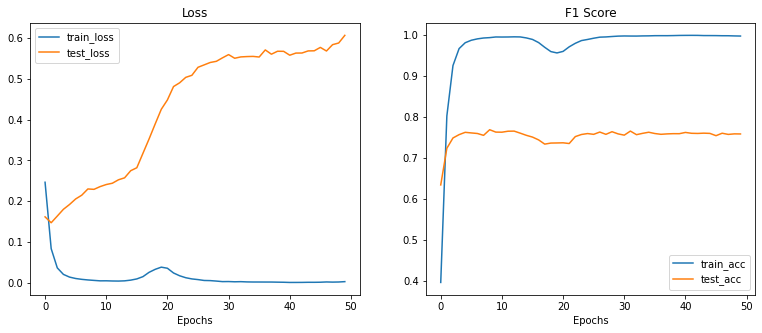

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,2, figsize = (13,5))
ax[0].plot(range(50), history['train_loss'], label = "train_loss")
ax[0].plot(range(50), history['test_loss'], label = "test_loss")
ax[0].set_title('Loss')
ax[0].set_xlabel('Epochs')
ax[0].legend()

ax[1].plot(range(50), history['train_acc'], label = "train_acc")
ax[1].plot(range(50), history['test_acc'], label = "test_acc")
ax[1].set_title('F1 Score')
ax[1].set_xlabel('Epochs')
ax[1].legend()

plt.show()

So as we can see the F1 Score of simple linear model can reach 0.7-0.75, but the wired thing is the test_loss increase, which is totally unacceptable. This means the model didn't work.